# Analyzing data from clusters FAMD

In [2]:
import pandas as pd
import numpy as np
import json
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi
import scipy.stats
# Configuración de pandas 
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Loading data

In [3]:
path_file = 'data/clusterizacion_v4.csv'
data = pd.read_csv(path_file)
data.head()

,Unnamed: 0,client_id,loan_id,state,arrears_days,total_paid,Monto Acumulado,Uso de los recursos,Plazo,Sector,Ingresos,Ubicación,Estrato Mínimo,Procesos judiciales,Alertas,Score Bureau Empresa,Huellas de Consulta,Tiempo en el negocio,Website empresa,Instagram empresa,LinkedIn empresa,LinkedIn empresarios,Edad empresarios,Activador,Número de accionistas,Impacto,Acceso previso a la banca,# Empleados,Mujeres empresarias,Mujeres en cargos directivos,cluster
0,0,241,1076,PAID_LATE,17,147915805.0,250000000,CR,25 a 36 meses,Servicios,Seed,Medellín,5,No,No,925.0,8.0,2016,Si,Si,Si,Si,45,Internet,2.0,No,Si,16,No,2,0
1,1,241,1244,PAID_LATE,23,91852726.0,250000000,CR,25 a 36 meses,Servicios,Seed,Medellín,5,No,No,925.0,8.0,2016,Si,Si,Si,Si,45,Internet,2.0,No,Si,16,No,2,0
2,2,362,1469,PAID_LATE,14,15211138.0,50000000,KT - EX,13 a 24 meses,Servicios,Seed,Medellín,3,No,No,924.0,2.0,2014,Si,No,Si,No,32,SocialNetworks,3.0,No,Si,3,No,0,1
3,3,428,119,PAID_LATE,64,8713879.0,40000000,SP,13 a 24 meses,Industria,Seed,Medellín,4,No,No,861.0,1.0,2015,Si,No,Si,Si,44,CreditProfessionalContact,2.0,No,Si,5,No,0,1
4,4,428,120,PAID_LATE,64,8102608.0,40000000,SP,13 a 24 meses,Industria,Seed,Medellín,4,No,No,861.0,1.0,2015,Si,No,Si,Si,44,CreditProfessionalContact,2.0,No,Si,5,No,0,1


In [4]:
data.isnull().any()

Unnamed: 0                      False
client_id                       False
loan_id                         False
state                           False
arrears_days                    False
total_paid                      False
Monto Acumulado                 False
Uso de los recursos             False
Plazo                           False
Sector                          False
Ingresos                        False
Ubicación                       False
Estrato Mínimo                  False
Procesos judiciales             False
Alertas                         False
Score Bureau Empresa            False
Huellas de Consulta             False
Tiempo en el negocio            False
Website empresa                 False
Instagram empresa               False
LinkedIn empresa                False
LinkedIn empresarios            False
Edad empresarios                False
Activador                       False
Número de accionistas           False
Impacto                         False
Acceso previ

## Data analysis

This section is to analyze clusters behaviour with two cathegorization of clients

### Cathegorical data

Text(0.5, 0.98, 'Frecuency of observation by cluster')

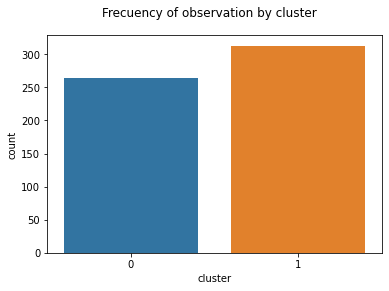

In [5]:
sns.countplot(x='cluster', data = data)
plt.suptitle('Frecuency of observation by cluster')

In [6]:
data['cluster'].value_counts()

1    313
0    264
Name: cluster, dtype: int64

We can see that there are more customers on the cluster_1 than the cluster_0

In [7]:
data['arrears_days'].describe()

count     577.000000
mean       70.963605
std       130.802891
min         0.000000
25%         2.000000
50%        16.000000
75%        76.000000
max      1083.000000
Name: arrears_days, dtype: float64

### Analyzing relationship on other variables with two clusters

In [8]:
#----------------------------------------------------------------

#### Cathegorical = cluster_id_2 vs Quantitative = 'Column name'

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    577 non-null    int64  
 1   client_id                     577 non-null    int64  
 2   loan_id                       577 non-null    int64  
 3   state                         577 non-null    object 
 4   arrears_days                  577 non-null    int64  
 5   total_paid                    577 non-null    float64
 6   Monto Acumulado               577 non-null    int64  
 7   Uso de los recursos           577 non-null    object 
 8   Plazo                         577 non-null    object 
 9   Sector                        577 non-null    object 
 10  Ingresos                      577 non-null    object 
 11  Ubicación                     577 non-null    object 
 12  Estrato Mínimo                577 non-null    int64  
 13  Proce

Text(0.5, 0.98, 'Cluster vs arrears_days')

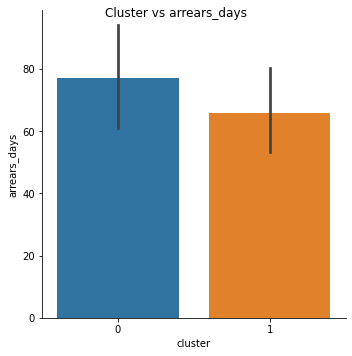

In [10]:
sns.catplot(x='cluster', y='arrears_days', kind='bar', data=data)
plt.suptitle('Cluster vs arrears_days')

On this graph we can see that cluster 1 has less arrears_days than cluster 0

Text(0.5, 0.98, 'Cluster vs Monto Acumulado')

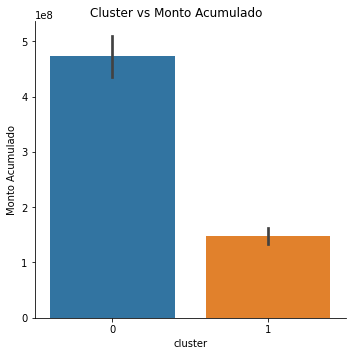

In [11]:
sns.catplot(x='cluster', y='Monto Acumulado', kind='bar', data=data)
plt.suptitle('Cluster vs Monto Acumulado')

Cluster 1 has less 'Monto Acumulado' than cluster 0

Text(0.5, 0.98, 'Cluster vs Score Bureau Empresa')

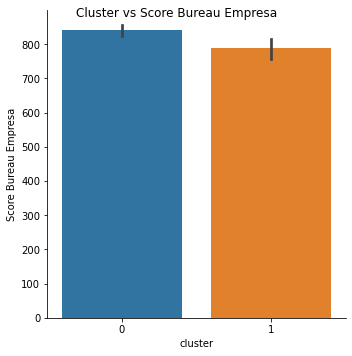

In [12]:
sns.catplot(x='cluster', y='Score Bureau Empresa', kind='bar', data=data)
plt.suptitle('Cluster vs Score Bureau Empresa')

Score Bureau between the two clusters are relatively similar

Text(0.5, 0.98, 'Cluster vs Huellas de Consulta')

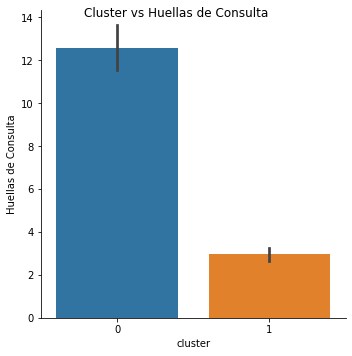

In [13]:
sns.catplot(x='cluster', y='Huellas de Consulta', kind='bar', data=data)
plt.suptitle('Cluster vs Huellas de Consulta')

Cluster 1 has less 'Huellas de consulta' than cluster 0

Text(0.5, 0.98, 'Cluster vs Número de accionistas')

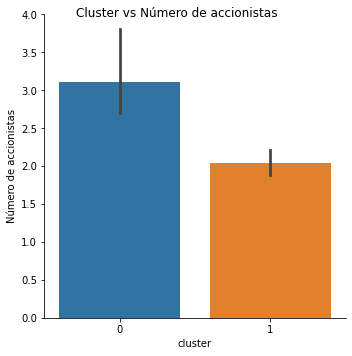

In [14]:
sns.catplot(x='cluster', y='Número de accionistas', kind='bar', data=data)
plt.suptitle('Cluster vs Número de accionistas')

Cluster 0 has more 'Accionistas' than cluster 1

Text(0.5, 0.98, 'Cluster vs # Empleados')

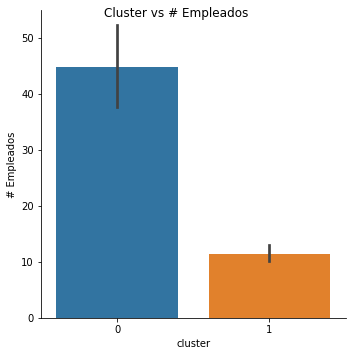

In [15]:
sns.catplot(x='cluster', y='# Empleados', kind='bar', data=data)
plt.suptitle('Cluster vs # Empleados')

Cluster 1 has more 'Empleados' than cluster 0

Text(0.5, 0.98, 'Cluster vs Mujeres en cargos directivos')

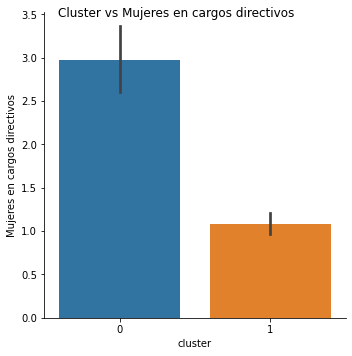

In [16]:
sns.catplot(x='cluster', y='Mujeres en cargos directivos', kind='bar', data=data)
plt.suptitle('Cluster vs Mujeres en cargos directivos')

Cluster 1 has more 'Mujeres en cargos directivos' than cluster 0

In [17]:
#--------------------------------------------------------

#### Cathegorical = cluster_id_2 vs Cathegorical = 'Column name'

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    577 non-null    int64  
 1   client_id                     577 non-null    int64  
 2   loan_id                       577 non-null    int64  
 3   state                         577 non-null    object 
 4   arrears_days                  577 non-null    int64  
 5   total_paid                    577 non-null    float64
 6   Monto Acumulado               577 non-null    int64  
 7   Uso de los recursos           577 non-null    object 
 8   Plazo                         577 non-null    object 
 9   Sector                        577 non-null    object 
 10  Ingresos                      577 non-null    object 
 11  Ubicación                     577 non-null    object 
 12  Estrato Mínimo                577 non-null    int64  
 13  Proce

In [19]:
data.groupby('cluster')['state'].value_counts()/len(data)

cluster  state    
0        PAID         0.188908
         PAID_LATE    0.161179
         LATE         0.107452
1        PAID         0.249567
         PAID_LATE    0.176776
         LATE         0.116118
Name: state, dtype: float64

Cluster 0 has more clients on state PAID than cluster 1, but at the same time has more clients on Late than cluster 1

In [20]:
data.groupby('cluster')['Uso de los recursos'].value_counts()/len(data)

cluster  Uso de los recursos
0        KT - EX                0.164645
         KT - CO                0.159445
         CR                     0.077990
         SP                     0.055459
1        KT - CO                0.214905
         KT - EX                0.183709
         CR                     0.084922
         SP                     0.058925
Name: Uso de los recursos, dtype: float64

We can see the distribution between the two clusters

In [21]:
data.groupby('cluster')['Plazo'].value_counts()/len(data)

cluster  Plazo            
0        13 a 24 meses        0.185442
         Menos de 12 meses    0.171577
         25 a 36 meses        0.084922
         Más de 37 meses      0.015598
1        13 a 24 meses        0.322357
         Menos de 12 meses    0.147314
         25 a 36 meses        0.069324
         Más de 37 meses      0.003466
Name: Plazo, dtype: float64

In [22]:
# Cluster 0 has more clients on 'Plazo' on 13 to 24 months. On the other hand we have cluster 1 with 'Plazo' less than 12 months

In [23]:
data.groupby('cluster')['Sector'].value_counts()/len(data)

cluster  Sector   
0        Servicios    0.225303
         Industria    0.166378
         Comercio     0.065858
1        Servicios    0.372617
         Comercio     0.095321
         Industria    0.074523
Name: Sector, dtype: float64

In [24]:
# Cluster 0 has a ranking of (Servicios, Comercio and Industria) - Cluster 1 has a ranking of (Servicios, Industria y Comercio)

In [25]:
data.groupby('cluster')['Ingresos'].value_counts()/len(data)

cluster  Ingresos
0        Venture     0.162912
         Scale Up    0.121317
         Growth      0.100520
         Seed        0.072790
1        Seed        0.363951
         Venture     0.133449
         Scale Up    0.038128
         Growth      0.006932
Name: Ingresos, dtype: float64

In [26]:
data.groupby('cluster')['Acceso previso a la banca'].value_counts()/len(data)

cluster  Acceso previso a la banca
0        Si                           0.412478
         No                           0.045061
1        Si                           0.291161
         No                           0.251300
Name: Acceso previso a la banca, dtype: float64

In [27]:
data.groupby('cluster')['Mujeres empresarias'].value_counts()/len(data)

cluster  Mujeres empresarias
0        No                     0.393414
         Si                     0.064125
1        No                     0.412478
         Si                     0.129983
Name: Mujeres empresarias, dtype: float64

In [28]:
data.groupby('cluster')['Activador'].value_counts()/len(data)

cluster  Activador                
0        Other                        0.142114
         FriendOrColleague            0.123050
         CreditProfessionalContact    0.090121
         Internet                     0.051993
         Newspapers                   0.013865
         SocialNetworks               0.013865
         Email                        0.012132
         Referrer                     0.008666
         CommunicationMedia           0.001733
1        FriendOrColleague            0.175043
         Internet                     0.095321
         CreditProfessionalContact    0.065858
         Other                        0.057192
         Newspapers                   0.055459
         SocialNetworks               0.036395
         Referrer                     0.031196
         CommunicationMedia           0.010399
         RutaN                        0.008666
         Fenalco                      0.006932
Name: Activador, dtype: float64

In [29]:
data.groupby('cluster')['Website empresa'].value_counts()/len(data)

cluster  Website empresa
0        Si                 0.367418
         No                 0.090121
1        Si                 0.334489
         No                 0.207972
Name: Website empresa, dtype: float64

In [30]:
data.groupby('cluster')['Estrato Mínimo'].value_counts()/len(data)

cluster  Estrato Mínimo
0        4                 0.154246
         5                 0.147314
         6                 0.100520
         3                 0.055459
1        4                 0.173310
         5                 0.168111
         3                 0.105719
         6                 0.088388
         2                 0.006932
Name: Estrato Mínimo, dtype: float64

In [31]:
data.groupby('cluster')['Ubicación'].value_counts()/len(data)

cluster  Ubicación          
0        Bogotá D.C.            0.173310
         Medellín               0.155979
         La Estrella            0.036395
         Itagüí                 0.032929
         Sabaneta               0.019064
         Barranquilla           0.012132
         Envigado               0.012132
         Manizales              0.003466
         Rionegro               0.003466
         Bello                  0.001733
         Cartagena de indias    0.001733
         Marinilla              0.001733
         Neiva                  0.001733
         Pereira                0.001733
1        Bogotá D.C.            0.233969
         Medellín               0.207972
         Barranquilla           0.024263
         Envigado               0.024263
         Cali                   0.015598
         Bucaramanga            0.010399
         Itagüí                 0.003466
         La Estrella            0.003466
         Manizales              0.003466
         Pereira            

In [32]:
data.groupby('cluster')['Procesos judiciales'].value_counts()/len(data)

cluster  Procesos judiciales
0        No                     0.334489
         Si                     0.123050
1        No                     0.507799
         Si                     0.034662
Name: Procesos judiciales, dtype: float64

In [33]:
data.groupby('cluster')['Instagram empresa'].value_counts()/len(data)

cluster  Instagram empresa
0        Si                   0.240901
         No                   0.216638
1        No                   0.292894
         Si                   0.249567
Name: Instagram empresa, dtype: float64

In [34]:
data.groupby('cluster')['Impacto'].value_counts()/len(data)

cluster  Impacto
0        No         0.433276
         Si         0.024263
1        No         0.485269
         Si         0.057192
Name: Impacto, dtype: float64